## Pipeline for Weather Forecasting App - Upgraded 2.0

Unveil the Secrets of the Skies: Your Ultimate Weather Adventure Awaits! 

Explore atmospheric wonders, decode weather conditions, track pressure and wind speed, and unlock the hidden patterns of nature with our captivating weather app!

### Work Process: 

Firstly, I to used a weather API for fetching the data from the Open Weather Map website by generating an API key of Current Weather Data (that has an access of current weather data for any location on Earth including over 200,000 cities), and then created a configuration file to store the key. Finally, I used that configuration file in the python script for Forecasting GUI App.

Also I used ttk module for styling my app UI and `PIL`` Module to add weather icon into the upgraded version of my app as shown below.

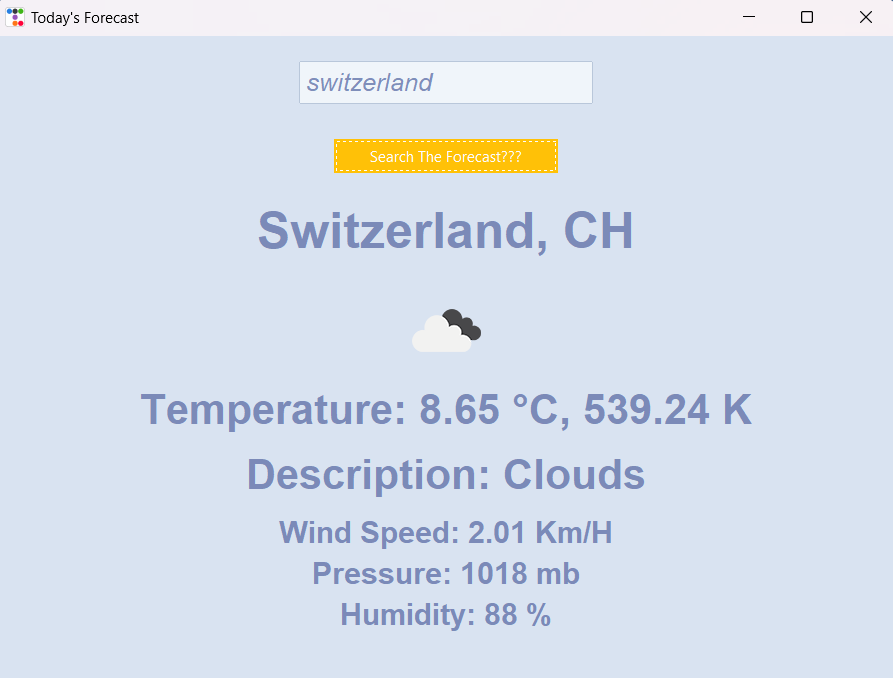

### Importing Modules

Modules required:

* Tkinter: It is a built-in python library for making GUI using tkinter toolkit.
* Requests: It is a library which helps in fetching the data with the help of URL.
* PIL: Python Imaging Library is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.
* ttkbootstrap: This module provides access to the Tk themed widget set.

In [1]:
# Import required modules
import tkinter as tk
import requests
from tkinter import messagebox
from PIL import Image, ImageTk
from configparser import ConfigParser
import ttkbootstrap

### Pipeline Function

In [2]:
# Extract key from the
# configuration file
api_url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}"
api_file = "weather.key"
config = ConfigParser()
config.read(api_file)
api_key = config['api_key']['key']

# Function to get weather details from OpenWeatherMap API
def getweather(city):
    res = requests.get(api_url.format(city, api_key))
    
    if res:
        json = res.json()
        city = json['name']
        country_name = json['sys']['country']
        icon_id = json['weather'][0]['icon']
        temp_kelvin = json['main']['temp']
        temp_celsius = temp_kelvin - 273.15
        temp_fahrenheit = (temp_kelvin) * 1.8 + 32
        weather_description = json['weather'][0]['main']
        wind_description = json['wind']['speed']
        pressure_description = json['main']['pressure']
        humidity_description = json['main']['humidity']
        
        # Get the icon URL and return all the weather information
        icon_url = f"http://openweathermap.org/img/wn/{icon_id}@2x.png"
        
        # Calling final list
        return (icon_url, temp_celsius, temp_fahrenheit, weather_description, wind_description, pressure_description,
                humidity_description, city, country_name)
    
    else:
        print("Error - No Forecast Found, Try Again!!!")
        
# Function to Search weassther for a city or state
def search_forecast():
    city = city_enter.get()
    weather = getweather(city)
    
    if weather is None:
        return
    # If the city is found, unpack the weather information
    icon_url, temp_celsius, temp_fahrenheit, weather_description, wind_description, pressure_description, humidity_description,  city, country_name = weather
        
    loc_label.configure(text=f"{city}, {country_name}")

    # Get the weather icon image from the URL and update the icon label
    image = Image.open(requests.get(icon_url, stream=True).raw)
    icon = ImageTk.PhotoImage(image)
    icon_label.configure(image=icon)
    icon_label.image = icon

    # Update the temperature and description labels
    temp_label.configure(text=f"Temperature: {temp_celsius:.2f} °C, {temp_fahrenheit:.2f} K")
    weather_cond.configure(text=f"Description: {weather_description}")
    wind_label.configure(text=f"Wind Speed: {wind_description} Km/H")
    pressure_label.configure(text=f"Pressure: {pressure_description} mb")
    humidity_cond.configure(text=f"Humidity: {humidity_description} %")

### Driver Code

In [3]:
# create object
app = ttkbootstrap.Window(themename = "morph")

# add title
app.title("Today's Forecast")

# adjust window size
app.geometry("900x650")

# Entry box:  add labels, buttons and text
city_enter = ttkbootstrap.Entry(app, font=("Time New Roman", 15, "italic"))
city_enter.pack(pady=25) # pady: the number of pixels surrounding the widget to create a padding between other widgets,
                           # for horizontal or vertical padding.

# Search button
search_button = ttkbootstrap.Button(app, text = "Search The Forecast???", width=25,  
                        command = search_forecast, bootstyle="warning")
search_button.pack(pady = 10)

# Location addition
loc_label = tk.Label(app, font=("Calibre", 30, 'bold'))
loc_label.pack(pady=15)

# Weather Icon
icon_label = tk.Label(app)
icon_label.pack()

# Temperature addition
temp_label = tk.Label(app, font=("Calibre", 25, 'bold'))
temp_label.pack()

# Weather Condition
weather_cond = tk.Label(app, font=("Calibre", 25, 'bold'))
weather_cond.pack(pady=10)

# Wind addition
wind_label = tk.Label(app, font=("Calibre", 18, 'bold'))
wind_label.pack()

# Pressure addition
pressure_label = tk.Label(app, font=("Calibre", 18, 'bold'))
pressure_label.pack()

# Humidity Condition
humidity_cond = tk.Label(app, font=("Calibre", 18, 'bold'))
humidity_cond.pack()

app.mainloop()

Note: Steps to create the Configuration file:

* Create a text file named "waether_key"on your jupyter notebook.
* Write key name enclosed in closed brackets in it as [api].
* Create a variable key here I used was "key" and paste the key you copied from the Open Weather Map website.